## 국가별 음주 데이터 분석하기
### 탐색 : 데이터의 기초 정보 살펴보기 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

path = '../data/drinks.csv'
drinks = pd.read_csv(path)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [2]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 인사이트 발견 : 탐색과 시각화
- 피처 간의 상관 관계를 통계적으로 탐색하는 방법
    1. 단순 상관 분석 방법 : 피처가 2개일 때의 상관 계수 계산
    2. 다중 상관 분석 : 대상 피처가 여러 개일 때 상호 간의 연관성을 분석
    - 상관 분석 : 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것

In [4]:
# corr로 두 피처에 대한 상관 관수 계산 
# method = 'pearson'은 가장 널리 쓰이는 계산 방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


### 시각화

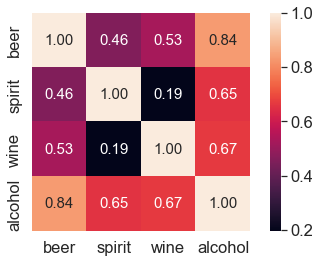

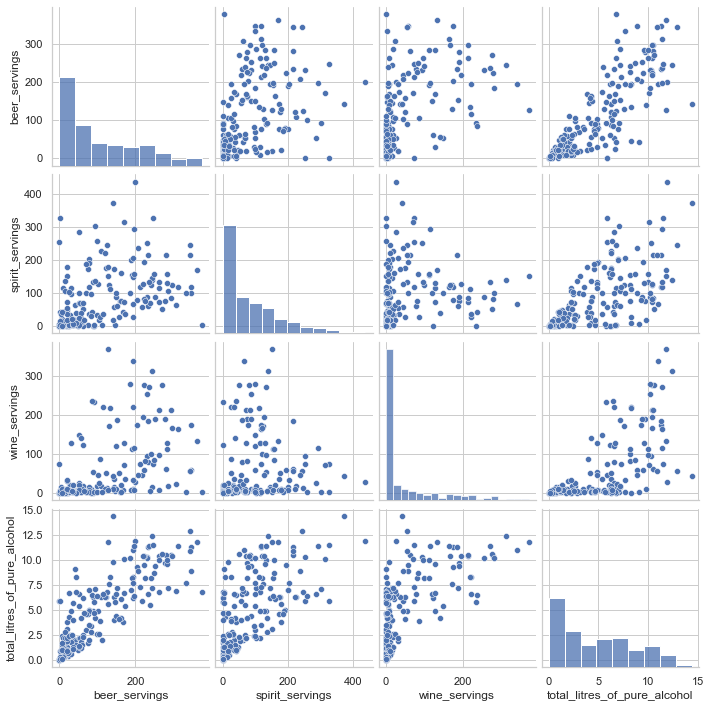

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

sns.set(style='whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']],
            height = 2.5)

plt.show()

### 탐색적 분석
- filna() 함수를 사용하여 NaN 값을 OT로 채움

In [7]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


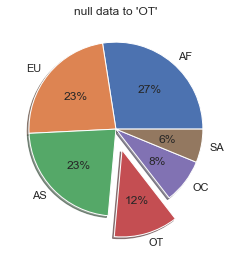

In [8]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title('null data to \'OT\'')
plt.show()

### 대륙별 spirit_servings의 통계적 정보는 어느 정도일까?
- agg() 함수를 사용하여 대륙 단위로 분석 수행 
- agg() 함수는 인자로 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 연산 결과를 동시에 얻을 수 있는 함수
- agg['mean', 'min', 'max', 'sum'] 

In [9]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까? 
- mean() 함수와 필터링으로 탐색 수행

In [10]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### 평균 beer_servings가 가장 높은 대륙은 어디일까?
- idxmax()는 시리즈 객체에서 가장 큰 index를 반환

In [12]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

### 시각화

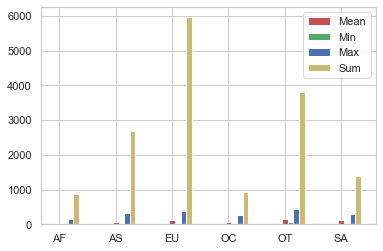

In [13]:
# 대륙별 spirtit_servings 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1 

rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rect3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = 'Max')
rect4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

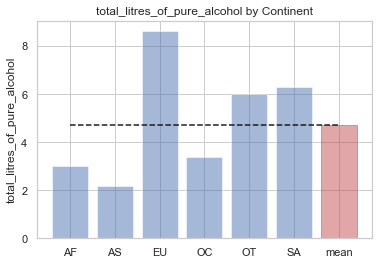

In [14]:
# 대륙별 total_litres_of_pure_alcohol 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

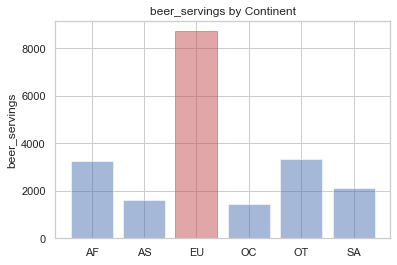

In [15]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

### 통계적 분석 : 분석 대상 간의 통계적 차이 검정
- 분석 결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정 필요
- 기본적인 방법인 t-test를 통해 분석 대상 간 통계적 차이 검정
- t-test 
    - 두 집단 간 평균의 차이에 대한 검정 방법, 모집단의 평균 같이 실제 정보를 모를 때 현재
    데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법 
    - 단, 검정 대상인 두 집단의 데이터 개수가 비슷하면서 두 데이터가 정규 분포를 보이는 경우에
    신뢰도가 높은 검정 방식
- scipy 라이브러리를 활용하여 t-test 검정 가능
- ttest_ind() 함수에 두 집단의 시리즈 데이터를 넣는 것으로 검정 결과 확인
- equal_var 파라미터 
    1. 두 집단의 분산이 같은 경우
    2. 두 집단의 분산이 같지 않은 경우

In [17]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], 
                                    europe['beer_servings'], equal_var = False)

print('The t-statistic and p-value assuming equal variances is %.3f and %.3f.' % tTestResult)
print('The t-statistic and p-value not assuming equal variances is %.3f and %.3f.' % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000.


### 위 실행 결과 해석 
- t-statistic은 t-test의 검정 통계량을 의미인데 p-value와 연관 지어 해석해야함 
- p-value : 가설이 얼마나 믿을만한 것인지를 나타내는 지표 
    - 데이터를 새로 샘플링했을 때 귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률 
    - p-value가 너무 낮으면 귀무 가설이 일어날 확률이 너무 낮아 기각 
    - 0.05나 0.01을 기준으로하며 이를 p-value(유의확률)이라고 함
    - 귀무 가설 : 처음부터 버릴 것을 예상하는 가설, 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설

### 대한민국은 얼마나 독하게 술을 마시는 나라일까? 
- alcohol_rate 피처 생성 : total_litres_of_pure_alcohol 피처를 모든 술 소비량으로 나눈 것 

In [18]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings'] 

drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending = 0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


### 시각화

Text(24, 0.1093939393939394, 'South Korea : 13')

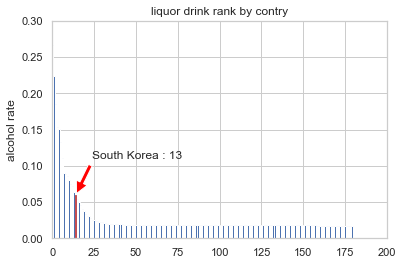

In [20]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank - 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))
